In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from wotan import flatten
from wotan import transit_mask

from astropy.io import fits
from astropy.wcs import WCS

%matplotlib widget

In [2]:
sector49_tpf = '../TESS/sector49_tp.fits'
sector49_lcf = '../TESS/sector49_lc.fits'

sector50_tpf = '../TESS/sector50_tp.fits'
sector50_lcf = '../TESS/sector50_lc.fits'

sector76_tpf = '../TESS/sector76_tp.fits'
sector76_lcf = '../TESS/sector76_lc.fits'

lcf49_hdu = fits.open(sector49_lcf)
lcf50_hdu = fits.open(sector50_lcf)
lcf76_hdu = fits.open(sector76_lcf)

In [3]:
bjd_tdb_76 = lcf76_hdu[1].data['TIME'] + lcf76_hdu[1].header['BJDREFI'] +  lcf76_hdu[1].header['BJDREFF']
sap_flux_76 = lcf76_hdu[1].data['SAP_FLUX']
sap_flux_err_76 = lcf76_hdu[1].data['SAP_FLUX_ERR']
pdcsap_flux_76 = lcf76_hdu[1].data['PDCSAP_FLUX']
pdcsap_flux_err_76 = lcf76_hdu[1].data['PDCSAP_FLUX_ERR']
quality_bitmask_76 = lcf76_hdu[1].data['QUALITY']

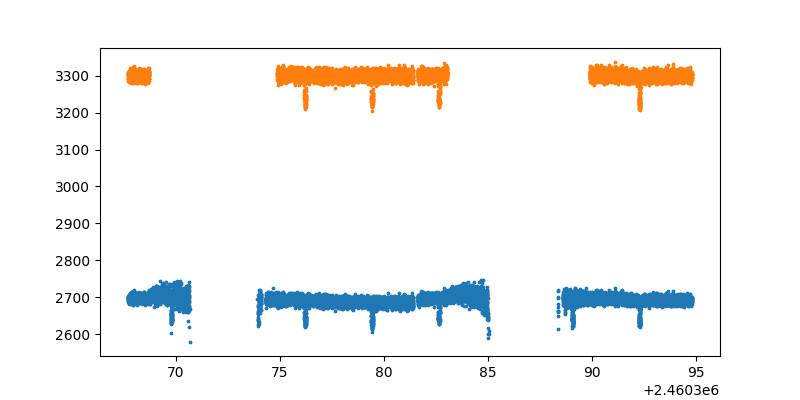

In [4]:
plt.figure(figsize=(8 ,4))

plt.scatter(bjd_tdb_76, sap_flux_76, s=3)
plt.scatter(bjd_tdb_76, pdcsap_flux_76, s=3)

plt.show()

In [5]:
finite_selection = np.isfinite(pdcsap_flux_76)

flag_to_be_checked = np.array([1,2,3,4,5,6,7,8,10,13,15])
reference_bitmask_in_decimal_system = 0

for v in flag_to_be_checked:
    reference_bitmask_in_decimal_system += 2**(v-1)

print(reference_bitmask_in_decimal_system)

selective_selection = ~(np.bitwise_and(quality_bitmask_76, reference_bitmask_in_decimal_system) > 0) & finite_selection
conservative_selection = ~(quality_bitmask_76 > 0) & finite_selection

print(np.sum(selective_selection))
print(np.sum(conservative_selection))

21247
9980
9980


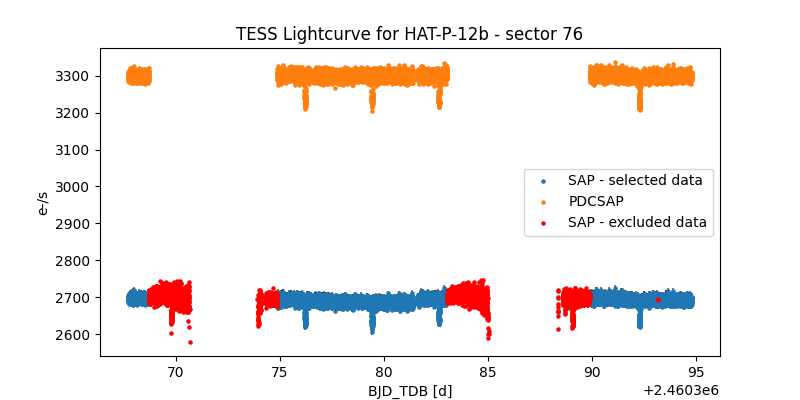

In [6]:
plt.figure(figsize=(8, 4))

plt.scatter(bjd_tdb_76[conservative_selection], sap_flux_76[conservative_selection],
            s=5, label='SAP - selected data')
plt.scatter(bjd_tdb_76, pdcsap_flux_76, s=5, label='PDCSAP')
plt.scatter(bjd_tdb_76[~conservative_selection], sap_flux_76[~conservative_selection],
            s=5, c='r', label='SAP - excluded data')
plt.errorbar(bjd_tdb_76[conservative_selection], sap_flux_76[conservative_selection],
            yerr=sap_flux_err_76[conservative_selection], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for HAT-P-12b - sector 76", fontsize = 12)

plt.legend()
plt.show()

In [7]:
final_selection = conservative_selection & (bjd_tdb_76 > 2460370.0)
print(np.sum(final_selection))

9257


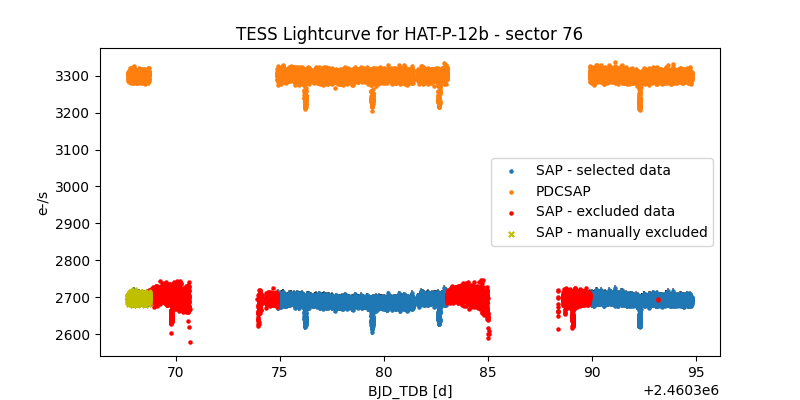

In [8]:
plt.figure(figsize=(8, 4))

plt.scatter(bjd_tdb_76[conservative_selection], sap_flux_76[conservative_selection],
            s=5, label='SAP - selected data')
plt.scatter(bjd_tdb_76, pdcsap_flux_76, s=5, label='PDCSAP')


plt.scatter(bjd_tdb_76[~conservative_selection], sap_flux_76[~conservative_selection],
            s=5, c='r', label='SAP - excluded data')
plt.scatter(bjd_tdb_76[~final_selection & conservative_selection], sap_flux_76[~final_selection & conservative_selection],
            s=15, c='y', marker='x', label='SAP - manually excluded')
plt.errorbar(bjd_tdb_76[conservative_selection], sap_flux_76[conservative_selection],
            yerr=sap_flux_err_76[conservative_selection], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for HAT-P-12b - sector 76", fontsize = 12)

plt.legend()
plt.show()

In [9]:
sector76_dictionary = {
    'time': bjd_tdb_76[final_selection],
    'sap_flux': sap_flux_76[final_selection],
    'sap_flux_error': sap_flux_err_76[final_selection],
    'pdcsap_flux': sap_flux_76[final_selection],
    'pdcsap_flux_error': sap_flux_err_76[final_selection],
}

#pickle.dump(sector76_dictionary, open('../Results/TESS/sector76_selected.p', 'wb'))

In [10]:
from TESS_LC_Class import Selection
from TESS_LC_Class import Filtering

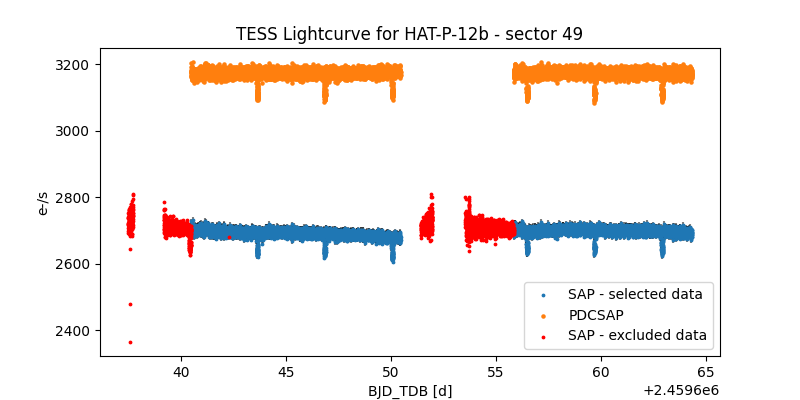

In [11]:
selection_s49 = Selection(lcf49_hdu, 49)

plt.figure(figsize=(8, 4))
sector49_dictionary = selection_s49.selection()

In [12]:
sector76_hspline = Filtering()
sector76_hspline.filtering(sector76_dictionary, window=.5, break_tol=0.5, method='hspline', duration_factor=2, pdc=False)
sector76_hspline.filtering(sector76_dictionary, window=.5, break_tol=0.5, method='hspline', duration_factor=2, pdc=True)

This is worth, give it a look!
Median flux error =  0.002643
STD with mask =  0.002646
STD without mask =  0.002656
This is worth, give it a look!
Median flux error =  0.002643
STD with mask =  0.002646
STD without mask =  0.002656


/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


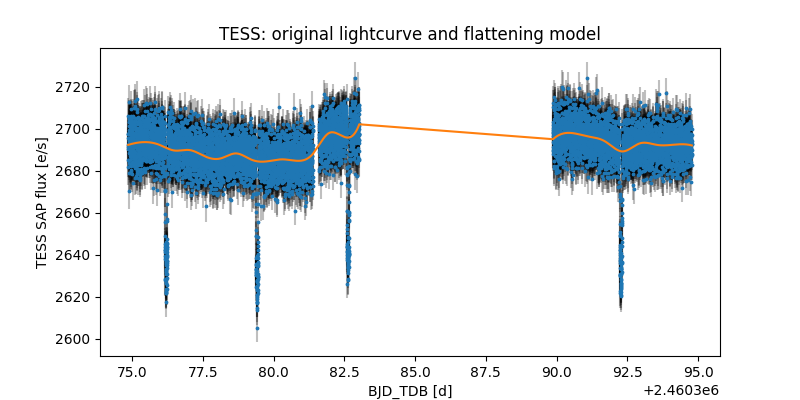

In [13]:
plt.figure(figsize=(8, 4))

mask = sector76_hspline.mask

sector76_hspline.make_plot_model(pdc=False)

In [14]:
sector76_bw = Filtering()
sector76_bw.filtering(sector76_dictionary, False, window=1., break_tol=0.5, method='biweight', duration_factor=2)
sector76_bw.filtering(sector76_dictionary, True, window=1., break_tol=0.5, method='biweight', duration_factor=2)

This is worth, give it a look!
Median flux error =  0.002643
STD with mask =  0.002648
STD without mask =  0.002647
This is worth, give it a look!
Median flux error =  0.002643
STD with mask =  0.002648
STD without mask =  0.002647


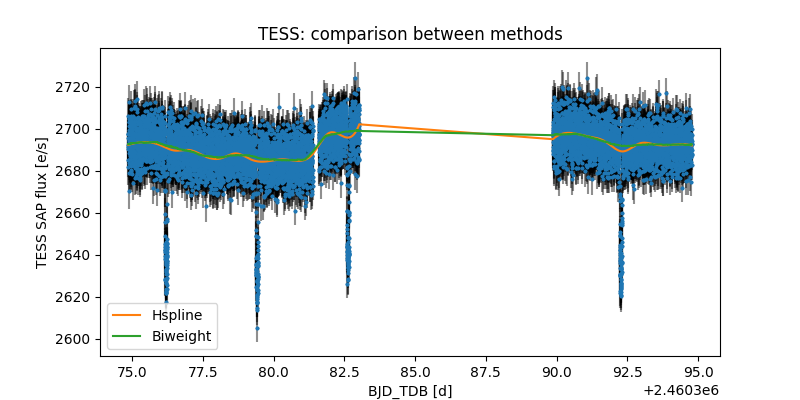

In [15]:
plt.figure(figsize=(8, 4))

sector76_hspline.make_plot_comparison_methods(False, 'Hspline', 'C1')
sector76_bw.make_plot_comparison_methods(False, 'Biweight', 'C2')

plt.show()

In [16]:
sector49_hspline = Filtering()
sector49_hspline.filtering(sector49_dictionary, window=.5, break_tol=0.5, method='hspline', duration_factor=2, pdc=False)
sector49_hspline.filtering(sector49_dictionary, window=.5, break_tol=0.5, method='hspline', duration_factor=2, pdc=True)

sector49_bw = Filtering()
sector49_bw.filtering(sector49_dictionary, window=.5, break_tol=0.5, method='biweight', duration_factor=2, pdc=False)
sector49_bw.filtering(sector49_dictionary, window=.5, break_tol=0.5, method='biweight', duration_factor=2, pdc=True)

/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
S

You may discard this configuration, but give it a look. Just in case...
Median flux error =  0.002733
STD with mask =  0.002666
STD without mask =  0.002679


/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/michele/miniforge3/envs/astrolab2/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
S

You may discard this configuration, but give it a look. Just in case...
Median flux error =  0.002733
STD with mask =  0.002666
STD without mask =  0.002679
You may discard this configuration, but give it a look. Just in case...
Median flux error =  0.002733
STD with mask =  0.002662
STD without mask =  0.002662
You may discard this configuration, but give it a look. Just in case...
Median flux error =  0.002733
STD with mask =  0.002662
STD without mask =  0.002662


In [17]:
sector49_dictionary_hs = {
    'time': sector49_hspline.time,
    'selected_flux': sector49_hspline.pdcsap_flux_flatten_masked,
    'selected_flux_error': sector49_hspline.pdcsap_flux_flatten_masked/sector49_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector49_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector49_hspline.sap_flux_err/sector49_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector49_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector49_bw.sap_flux_flatten_masked/sector49_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector49_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector49_hspline.pdcsap_flux_err/sector49_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector49_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector49_bw.pdcsap_flux_err/sector49_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector49_dictionary_hs, 
            open('../Results/TESS/sector49_flatten.p','wb'))

In [18]:
sector76_dictionary_hs = {
    'time': sector76_hspline.time,
    'selected_flux': sector76_hspline.pdcsap_flux_flatten_masked,
    'selected_flux_error': sector76_hspline.pdcsap_flux_err/sector76_hspline.pdcsap_flatten_model_masked,
    'sap_masked_hspline_flux': sector76_hspline.sap_flux_flatten_masked,
    'sap_masked_hspline_flux_error': sector76_hspline.sap_flux_err/sector76_hspline.sap_flatten_model_masked,
    'sap_masked_bw_flux': sector76_bw.sap_flux_flatten_masked,
    'sap_masked_bw_flux_error': sector76_bw.sap_flux_flatten_masked/sector76_bw.sap_flatten_model_masked,
    'pdcsap_masked_hspline_flux': sector76_hspline.pdcsap_flux_flatten_masked,
    'pdcsap_masked_hspline_flux_error': sector76_hspline.pdcsap_flux_err/sector76_hspline.pdcsap_flatten_model_masked,
    'pdcsap_masked_bw_flux': sector76_bw.pdcsap_flux_flatten_masked,
    'pdcsap_masked_bw_flux_error': sector76_hspline.pdcsap_flux_err/sector76_bw.pdcsap_flatten_model_masked,
}

pickle.dump(sector76_dictionary_hs, 
            open('../Results/TESS/sector76_flatten.p','wb'))